In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deliverable 3 for Team 3

### Third Batch of Data

On top of deliverable 2's data, we scraped the year information for articles and proceedings from MIT collaboration's website. We also scraped the year for when each professor started working at MIT. 

### Refined Preliminary Analysis

Since in this deliverable we acquired new data for articles, proceeding and work year, we only updated and included the preliminary analysis for these new data in the next few sections.

### Preprocessing Step

Here we remove USPTO numbers for patent applications (has the format of nn/nnnnnn or 11-12 digits) or in the wrong format

In [2]:
#df = pd.read_csv('D:\CS\cs506\project/patents_date.csv')
df = pd.read_csv('patents_date.csv')

print('Before processing: ', df.shape)
df_patents = df[~df['USPTO'].str.contains('/')].reset_index()
df_patents['Len_USPTO'] = df_patents['USPTO'].astype(str).apply(len)
df_patents = df_patents[(df_patents['Len_USPTO'] > 6) & (df_patents['Len_USPTO'] < 9)]
print('After processing: ', df_patents.shape)


Before processing:  (5957, 3)
After processing:  (4467, 5)


Currently we are only able to acquire filing dates for ~3000 USPTO numbers from USPTO's database and hence eliminate those not yet found from our analysis.

In [3]:
df_patents_nonan = df_patents.dropna().reset_index()
df_patents_nonan['Year'] = pd.to_datetime(df_patents_nonan['Filing_Date']).dt.year
print('After eliminating nan values: ', df_patents_nonan.shape)
print('Number of unique patents in final selection: ', len(pd.unique(df_patents_nonan['USPTO'])))
print("A sample of df_patents_nonan")
print(df_patents_nonan.head())

After eliminating nan values:  (3779, 7)
Number of unique patents in final selection:  3013
A sample of df_patents_nonan
   level_0  index     USPTO  Author_Id Filing_Date  Len_USPTO  Year
0        0      0   9741253       1485  2015-10-09          7  2015
1        1      2  10917173       4030  2019-09-24          8  2019
2        2      3  10899479       4030  2018-06-11          8  2018
3        3      4  10826609       4030  2019-06-20          8  2019
4        4      5  10530478       4030  2017-11-06          8  2017


In [4]:
df_articles = pd.read_csv('articles.csv')
print("A sample of df_articles")
print(df_articles.head())

A sample of df_articles
                                               Title  Author_Id  Year  \
0  Robust Control of Arrivals Into a Queuing Network       1485  2021   
1   Control and Optimization of Air Traffic Networks       1485  2021   
2  Efficiency and Fairness in Unmanned Air Traffi...       1485  2021   
3  Comparative Analysis of Departure Metering at ...       1485  2020   
4  Sign-stability of Positive Markov Jump Linear ...       1485  2020   

   Citation_Count  
0               0  
1               0  
2               0  
3               0  
4               1  


In [5]:
df_proceedings = pd.read_csv('proceedings.csv')
print("A sample of df_proceedings")
print(df_proceedings.head())

A sample of df_proceedings
                                               Title  Author_Id  Year  \
0   Approximate Projection-Based Control of Networks       1485  2020   
1  Outlier Analysis of Airport Delay Distribution...       1485  2020   
2       Identification of Outliers in Graph Signals*       1485  2019   
3  Simulation-based Benefits and Costs Assessment...       1485  2018   
4  Evaluating the Impact of Uncertainty on Airpor...       1485  2018   

   Citation_Count  
0               0  
1               1  
2               1  
3               1  
4               5  


In [6]:
df_prof = pd.read_csv('MIT_Faculty_deliv3.csv')
df_2004 = pd.read_csv('prof_year/2004.csv')
test = df_2004.loc[df_2004['Id'].astype(str).str.contains("1485")]
print(test)
test2 = df_2004.loc[df_2004['Id'].astype(str).str.contains("2030")]
print(test2.shape[0])

df_2005 = pd.read_csv('prof_year/2005.csv')
df_2006 = pd.read_csv('prof_year/2006.csv')
df_2007 = pd.read_csv('prof_year/2007.csv')
df_2008 = pd.read_csv('prof_year/2008.csv')
df_2009 = pd.read_csv('prof_year/2009.csv')
df_2010 = pd.read_csv('prof_year/2010.csv')
df_2011 = pd.read_csv('prof_year/2011.csv')
df_2012 = pd.read_csv('prof_year/2012.csv')
df_2013 = pd.read_csv('prof_year/2013.csv')
df_2014 = pd.read_csv('prof_year/2014.csv')
df_2015 = pd.read_csv('prof_year/2015.csv')
df_2016 = pd.read_csv('prof_year/2016.csv')
df_2017 = pd.read_csv('prof_year/2017.csv')
df_2018 = pd.read_csv('prof_year/2018.csv')
df_2019 = pd.read_csv('prof_year/2019.csv')
df_2020 = pd.read_csv('prof_year/2020.csv')
df_2021 = pd.read_csv('prof_year/2021.csv')


        Id                 Name  PersonId  LastName  FirstName  \
0     1485  BALAKRISHNAN, HAMSA      6622       NaN        NaN   
862  14850     CISSE, IBRAHIM I    779065       NaN        NaN   

                       Department   RankName  TotalArticleCount  \
0    Aeronautics and Astronautics  Professor                 46   
862                       Physics  Associate                 25   

     TotalConfProcCount  TotalGrantCount  TotalGrantDollars  TotalAwardCount  \
0                    63               15                0.0                4   
862                   1                3                0.0                4   

     TotalCitationCount  TotalBookCount  
0                  1477               1  
862                2323               0  
0


In [7]:
import numpy as np

missing = 0

start_year = []
end_year = []
work_year = []

for id in df_prof['Id'].astype(str).tolist():
    min = 9999
    max = 0
    #df_2004.loc[df_2004['Id'].astype(str).str.contains(id)].shape[0] > 0
    if (df_2004[df_2004['Id'].astype(str) == id].shape[0] > 0):
        temp = 2004
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp
    
    if (df_2005[df_2005['Id'].astype(str) == id].shape[0] > 0):
        temp = 2005
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2006[df_2006['Id'].astype(str) == id].shape[0] > 0):
        temp = 2006
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2007[df_2007['Id'].astype(str) == id].shape[0] > 0):
        temp = 2007
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2008[df_2008['Id'].astype(str) == id].shape[0] > 0):
        temp = 2008
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2009[df_2009['Id'].astype(str) == id].shape[0] > 0):
        temp = 2009
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2010[df_2010['Id'].astype(str) == id].shape[0] > 0):
        temp = 2010
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2011[df_2011['Id'].astype(str) == id].shape[0] > 0):
        temp = 2011
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2012[df_2012['Id'].astype(str) == id].shape[0] > 0):
        temp = 2012
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2013[df_2013['Id'].astype(str) == id].shape[0] > 0):
        temp = 2013
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2014[df_2014['Id'].astype(str) == id].shape[0] > 0):
        temp = 2014
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2015[df_2015['Id'].astype(str) == id].shape[0] > 0):
        temp = 2015
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2016[df_2016['Id'].astype(str) == id].shape[0] > 0):
        temp = 2016
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2017[df_2017['Id'].astype(str) == id].shape[0] > 0):
        temp = 2017
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2018[df_2018['Id'].astype(str) == id].shape[0] > 0):
        temp = 2018
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2019[df_2019['Id'].astype(str) == id].shape[0] > 0):
        temp = 2019
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2020[df_2020['Id'].astype(str) == id].shape[0] > 0):
        temp = 2020
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    if (df_2021[df_2021['Id'].astype(str) == id].shape[0] > 0):
        temp = 2021
        if(temp < min):
            min = temp
        if(temp > max):
            max = temp

    
    start_year.append(min)
    end_year.append(max)
    work_year.append(max - min)
    if(max == 0 or min == 9999):
        missing += 1 

In [8]:
print(missing)
df_prof['Start_year'] = start_year
df_prof['End_year'] = end_year
df_prof['Work_year'] = work_year
print(df_prof.head())

2
     Id                  Name  PersonId                    Department  \
0  1485   BALAKRISHNAN, HAMSA      6622  Aeronautics and Astronautics   
1  5860      LEVESON, NANCY G     67304  Aeronautics and Astronautics   
2  2680  MASTERSON, REBECCA A    919190  Aeronautics and Astronautics   
3  7055          SEAGER, SARA    289272  Aeronautics and Astronautics   
4  5285            WANG, QIQI    412240  Aeronautics and Astronautics   

    RankName  TotalArticleCount  TotalConfProcCount  TotalGrantCount  \
0  Professor                 46                  63               15   
1  Professor                 49                  13               31   
2      Other                  1                  14                3   
3  Professor                265                  52               51   
4  Associate                109                  52               10   

   TotalGrantDollars  TotalAwardCount  TotalCitationCount  TotalBookCount  \
0                  0                4            

In [9]:
df_prof2 = df_prof[df_prof['Start_year'] != 9999]
df_old_prof = df_prof2[df_prof2['Start_year'] <= 2011]
df_new_prof = df_prof2[df_prof2['Start_year'] > 2011]

print(df_prof2.shape)
print(df_old_prof.shape)
print(df_new_prof.shape)

(1400, 20)
(1282, 20)
(118, 20)


# Preliminary

Gender
female     651.0
male      4215.0
Name: TotalPatentCount, dtype: float64
Gender
female    2.0
male      7.0
Name: TotalPatentCount, dtype: float64
Gender
female    2.484733
male      4.314227
Name: TotalPatentCount, dtype: float64
Gender
female    0.086957
male      0.145833
Name: TotalPatentCount, dtype: float64


<BarContainer object of 2 artists>

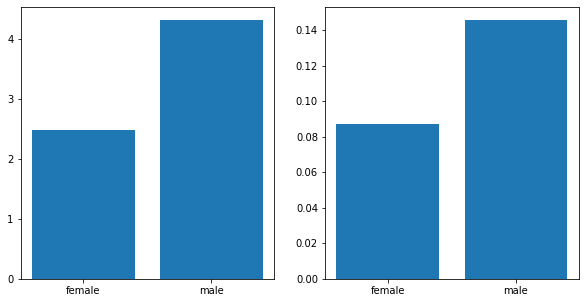

In [10]:
# Total patents counts by gender between old professors and new professors
Total_Patent_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalPatentCount'].sum()
print(Total_Patent_by_gender_sum_Old)
Total_Patent_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalPatentCount'].sum()
print(Total_Patent_by_gender_sum_New)
# Mean of total patents counts by gender between old professors and new professors
Total_Patent_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalPatentCount'].mean()
print(Total_Patent_by_gender_mean_Old)
Total_Patent_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalPatentCount'].mean()
print(Total_Patent_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_Patent_by_gender_mean_Old)
ax2.bar(gender, Total_Patent_by_gender_mean_New)

Gender
female     4220
male      18602
Name: TotalConfProcCount, dtype: int64
Gender
female    181
male      376
Name: TotalConfProcCount, dtype: int64
Gender
female    15.629630
male      18.381423
Name: TotalConfProcCount, dtype: float64
Gender
female    4.641026
male      4.759494
Name: TotalConfProcCount, dtype: float64


<BarContainer object of 2 artists>

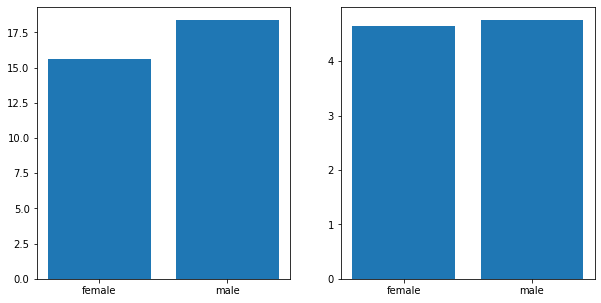

In [11]:
# Total conference proceedings counts by gender between old professors and new professors
Total_ConPro_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalConfProcCount'].sum()
print(Total_ConPro_by_gender_sum_Old)
Total_ConPro_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalConfProcCount'].sum()
print(Total_ConPro_by_gender_sum_New)
# Mean of total conference proceedings counts by gender between old professors and new professors
Total_ConPro_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalConfProcCount'].mean()
print(Total_ConPro_by_gender_mean_Old)
Total_ConPro_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalConfProcCount'].mean()
print(Total_ConPro_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_ConPro_by_gender_mean_Old)
ax2.bar(gender, Total_ConPro_by_gender_mean_New)

Gender
female    19784
male      91989
Name: TotalArticleCount, dtype: int64
Gender
female    1744
male      5938
Name: TotalArticleCount, dtype: int64
Gender
female    73.274074
male      90.898221
Name: TotalArticleCount, dtype: float64
Gender
female    44.717949
male      75.164557
Name: TotalArticleCount, dtype: float64


<BarContainer object of 2 artists>

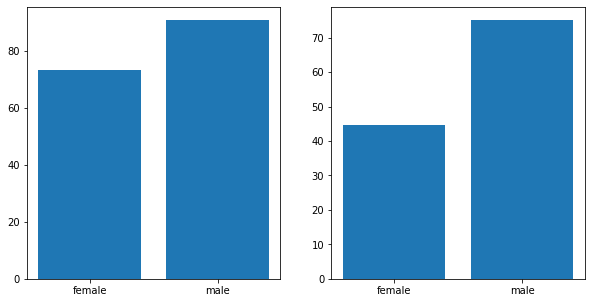

In [12]:
# Total article counts by gender between old professors and new professors
Total_Article_by_gender_sum_Old= df_old_prof.groupby('Gender')['TotalArticleCount'].sum()
print(Total_Article_by_gender_sum_Old)
Total_Article_by_gender_sum_New = df_new_prof.groupby('Gender')['TotalArticleCount'].sum()
print(Total_Article_by_gender_sum_New)
# Mean of total article counts by gender between old professors and new professors
Total_Article_by_gender_mean_Old = df_old_prof.groupby('Gender')['TotalArticleCount'].mean()
print(Total_Article_by_gender_mean_Old)
Total_Article_by_gender_mean_New = df_new_prof.groupby('Gender')['TotalArticleCount'].mean()
print(Total_Article_by_gender_mean_New)

gender =['female','male']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(gender, Total_Article_by_gender_mean_Old)
ax2.bar(gender, Total_Article_by_gender_mean_New)

# Key Question 3:

## Are newer professors (professors who have been at MIT less than ten years) experiencing similar gaps to older professors?

In [13]:
fields_of_interest = ['TotalPatentCount', 'TotalArticleCount', 'TotalConfProcCount']
import scipy.stats as stats

# testing at Confidence level 95%
alpha = 0.05



In [14]:
#function that returns False if H0 is rejected, otherwise True

def t_test_on_field(df):
    all_field_result = []

    for field in fields_of_interest:
        print("Current field of interest is: ", field)
    
        
        group_male = df[field][df['Gender'] == 'male']
        group_female = df[field][df['Gender'] == 'female']
        
        #print(group_male.shape[0])
        #print(group_female.shape[0])
        
        mnob = 0
        mmean = 0
        mvar = 0
        fnob = 0
        fmean = 0
        fvar = 0
        
        if (group_male.shape[0] > 0):
            mnob, _ , mmean, mvar, _, _ = stats.describe(group_male)
        
        if (group_female.shape[0] > 0):
            fnob, _ , fmean, fvar, _, _ = stats.describe(group_female)
    
        
        mstd = mvar ** 0.5
        fstd = fvar ** 0.5
        
        # a flag bit, 1 if male mean is higher and 0 if vice versa
        higher_bit = 0
        if mmean > fmean:
            higher_bit = 1
    
        _, pv = stats.levene(group_male,
                 group_female,
                 center= 'mean')
        
        if pv >= alpha:
            # insignificant pv, identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob)
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                print("Test result: False")
            else:
                all_field_result.append((True, -1))
                print("Test result: True")
        else:
            # significant pv, un-identical variation
            # t-test on H0: mean of male = mean of female
            stat, p_value = stats.ttest_ind_from_stats( mean1= mmean, std1= mstd, nobs1= mnob,

                                        mean2= fmean, std2= fstd, nobs2= fnob, equal_var = False)
            
            if p_value < alpha:
                # t-test result reject H0, significantly different
                all_field_result.append((False, higher_bit))
                print("Test result: False")
            else:
                all_field_result.append((True, -1))
                print("Test result: True")
    
    total_points = df.shape[0]
    warning = False
    male_count = df[df['Gender'] == 'male'].shape[0]
    female_count = df[df['Gender'] == 'female'].shape[0]
    if (male_count == 0 or female_count == 0):
        warning = True
    
    
    return (all_field_result, total_points, warning)

In [15]:
test_res_overall = t_test_on_field(df_prof2)
print(test_res_overall)



test_res_overall_old = t_test_on_field(df_old_prof)
print(test_res_overall_old)

test_res_overall_new = t_test_on_field(df_new_prof)
print(test_res_overall_new)




Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: False
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (False, 1), (True, -1)], 1400, False)
Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: True
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (True, -1), (True, -1)], 1282, False)
Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: True
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (True, -1), (True, -1)], 118, False)


In [16]:
print("Summary")
print()
print("For Total Patent Count")
print("Overall: ", test_res_overall[0][0][0], " Older: ", test_res_overall_old[0][0][0], " New: ", test_res_overall_new[0][0][0])
print("For Total Article Count")
print("Overall: ", test_res_overall[0][1][0], " Older: ", test_res_overall_old[0][1][0], " New: ", test_res_overall_new[0][1][0])
print("For Total Conference Proceedings Count")
print("Overall: ", test_res_overall[0][2][0], " Older: ", test_res_overall_old[0][2][0], " New: ", test_res_overall_new[0][2][0])
print()
print("Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity")

Summary

For Total Patent Count
Overall:  True  Older:  True  New:  True
For Total Article Count
Overall:  False  Older:  True  New:  True
For Total Conference Proceedings Count
Overall:  True  Older:  True  New:  True

Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity


## Interpretation of the results
### Comparing disparity between male and female professors who joined MIT before 2011 and after 2011

#### Patent Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Article Count:
The test showed that there is a disparity between male and female professors overall, however no statistically significant disparity was found between older and newer professors, which are both subsets of the overal test case. More on this will be discussed in the limitations section located at the bottom of the file.

#### Conference Proceedings Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.


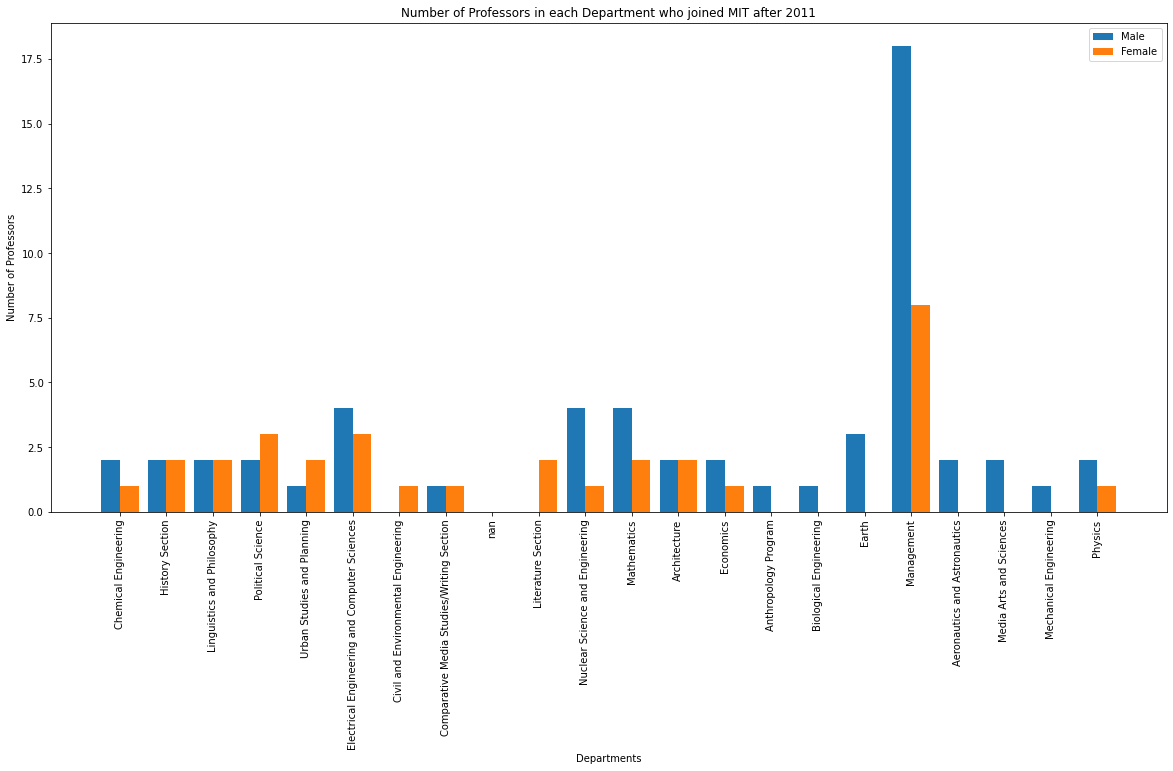

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X = df_new_prof['Department'].unique()
#print(X)

male = []
female = []

for dept in X:
    df = df_new_prof[df_new_prof['Department'] == dept]
    
    group_male = df[df['Gender'] == 'male']
    group_female = df[df['Gender'] == 'female']
    male.append(group_male.shape[0])
    female.append(group_female.shape[0])

  

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Number of Professors")
plt.title("Number of Professors in each Department who joined MIT after 2011")
plt.legend()

plt.show()

In [18]:
df_prof_short = df_prof2[df_prof2['Work_year'] <= 10]
df_prof_long = df_prof2[df_prof2['Work_year'] > 10]

print(df_prof2.shape)
print(df_prof_short.shape)
print(df_prof_long.shape)

(1400, 20)
(200, 20)
(1200, 20)


In [19]:
test_res_overall = t_test_on_field(df_prof2)
print(test_res_overall)



test_res_short = t_test_on_field(df_prof_short)
print(test_res_short)

test_res_long = t_test_on_field(df_prof_long)
print(test_res_long)

Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: False
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (False, 1), (True, -1)], 1400, False)
Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: True
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (True, -1), (True, -1)], 200, False)
Current field of interest is:  TotalPatentCount
Test result: True
Current field of interest is:  TotalArticleCount
Test result: False
Current field of interest is:  TotalConfProcCount
Test result: True
([(True, -1), (False, 1), (True, -1)], 1200, False)


In [20]:
print()
print()
print("Summary")
print()
print("For Total Patent Count")
print("Overall: ", test_res_overall[0][0][0], " Older: ", test_res_long[0][0][0], " New: ", test_res_short[0][0][0])
print("For Total Article Count")
print("Overall: ", test_res_overall[0][1][0], " Older: ", test_res_long[0][1][0], " New: ", test_res_short[0][1][0])
print("For Total Conference Proceedings Count")
print("Overall: ", test_res_overall[0][2][0], " Older: ", test_res_long[0][2][0], " New: ", test_res_short[0][2][0])
print()
print("Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity")



Summary

For Total Patent Count
Overall:  True  Older:  True  New:  True
For Total Article Count
Overall:  False  Older:  False  New:  True
For Total Conference Proceedings Count
Overall:  True  Older:  True  New:  True

Legend: True := H0 not rejected, no evidence for disparity, False := H0 rejected, significant disparity


## Interpretation of the results
### Comparing disparity between male and female professors who has worked in MIT for less than or equal to 10 years vs more than 10 years

#### Patent Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

#### Article Count:
The test showed that there is a disparity between male and female professors overall. The same disparity exists among older professors (professors who have worked in MIT for more than 10 years) but no significant disparity is found among newer professors.

#### Conference Proceedings Count:
The test showed that there was no disparity between male and female professors overall, between older professors and newer professors.

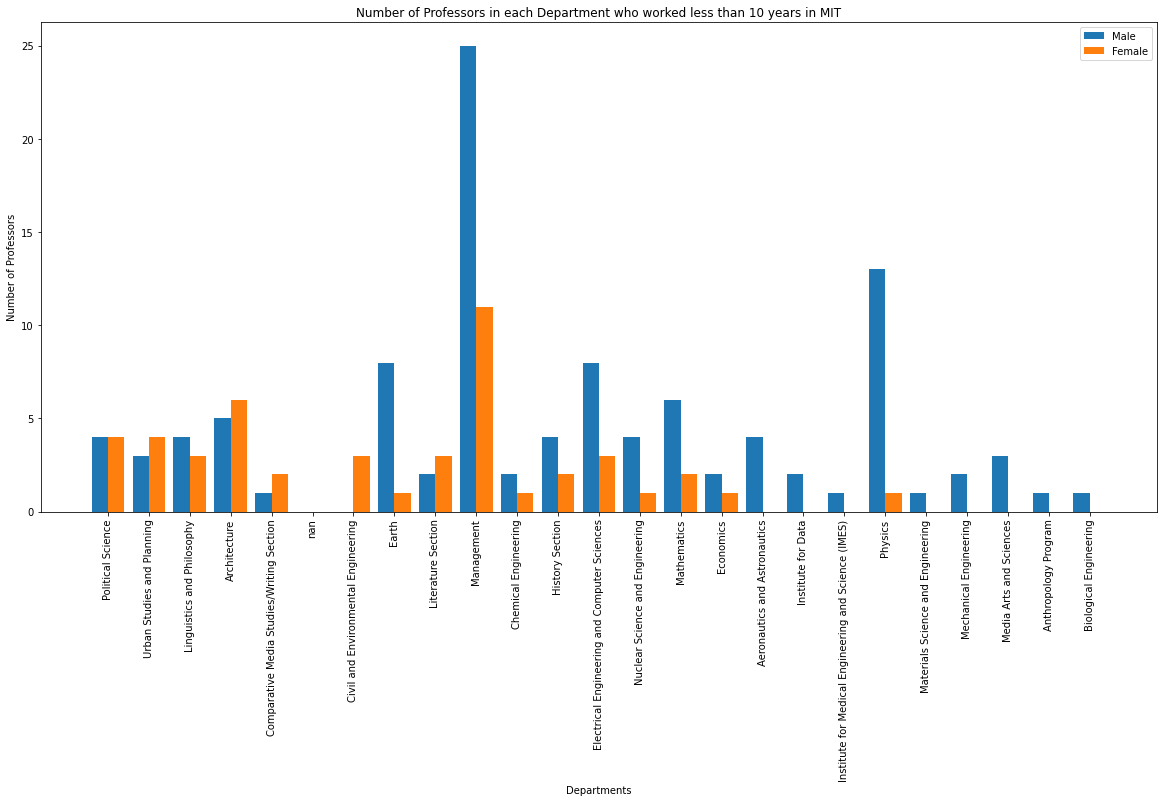

In [21]:
X = df_prof_short['Department'].unique()
#print(X)

male = []
female = []

for dept in X:
    df = df_prof_short[df_prof_short['Department'] == dept]
    
    group_male = df[df['Gender'] == 'male']
    group_female = df[df['Gender'] == 'female']
    male.append(group_male.shape[0])
    female.append(group_female.shape[0])

  

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')


plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Number of Professors")
plt.title("Number of Professors in each Department who worked less than 10 years in MIT")
plt.legend()

plt.show()




df_prof_front = df_prof2[df_prof2['Work_year'] <= 14]
df_prof_back = df_prof2[df_prof2['Work_year'] > 14]

print(df_prof2.shape)
print(df_prof_front.shape)
print(df_prof_back.shape)

# Limitations:
The biggest challenge for analyzing the data above is the imbalance & limited sample size between older and newer professors. From the preliminary analysis we also see that in general older professors has a lot more patents, articles and conference proceedings than the newer professors regardless of gender. This drastic difference meant that the only way to produce a meaningful test result was to test older professors and newer professors independently. In the case where we devided the professors by joining MIT before or after 2011, there were only 118 professors who joined after 2011 compared to 1282 professors who joined before. The limited sample size for newer professors meant a larger confidence interval for the tests which may be why for articles the disparity found in the entire dataset disappeared in the two subsets. The distribution for sample size slightly improved when we partitioned the professors by work year, with 200 in newer and 1200 in older, however it is still not ideal. The histogram after both tests plots the number of new professors for each department. Given the limited sample for newer professors, we decided that we would not compare the disparity between departments.